# Main Dashboard of PhD experiments in post silicon (specrate)

In [1]:

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from pca.pca import *
import pandas as pd

filename = 'post_silicon/summary_phd_specrate.csv'
df_data = pd.read_csv(filename)
df_data.fillna(0,inplace=True)

if os.path.exists(filename):
    df = pd.read_csv(filename)
    display(df)
    df_ = df.loc[:, df.columns != 'test_name']
    df_ = (df_-df_.min())/(df_.max()-df_.min())
    extracted_col = df["test_name"]
    df_.insert(0, 'test_name', extracted_col)
    df_.set_index('test_name')
    df_.to_csv('normalized_df.csv')
    df = df_

    features = list(df.columns)[2:]
    test_column = list(df.columns)[0]
    pca_df = get_PCA(df, features)
    display(pca_df)
else:
    print("Filename error")

,test_name,Kind,branch_misses,cache_misses,ipc,l1_dcache_load_misses
0,502.gcc_r,1,1.50,19.155,1.01,7.93
1,503.bwaves_r,0,0.81,83.474,1.01,7.83
2,505.mcf_r,1,5.65,38.871,0.61,16.37
3,507.cactuBSSN_r,0,1.24,49.287,1.03,19.66
4,519.lbm_r,0,1.64,51.959,1.08,14.75
5,520.omnetpp_r,1,2.11,8.288,0.76,9.46
6,521.wrf_r,0,0.95,14.311,1.21,4.00
7,523.xalancbmk_r,1,0.50,1.549,0.90,12.51
8,525.x264_r,1,1.58,13.336,2.24,1.73
9,527.cam4_r,0,1.76,17.822,1.37,7.29


,principal component 1,principal component 2,test_name
0,0.140541,-0.000475,502.gcc_r
1,1.104868,-1.625813,503.bwaves_r
2,2.636620,1.331690,505.mcf_r
3,1.933027,-1.352744,507.cactuBSSN_r
4,1.382352,-1.012055,519.lbm_r
5,0.617068,0.604615,520.omnetpp_r
6,-0.787180,-0.095993,521.wrf_r
7,0.420571,-0.244246,523.xalancbmk_r
8,-2.623463,-0.439223,525.x264_r
9,-0.494662,-0.089999,527.cam4_r


# Plot in 2D w/o clasification 

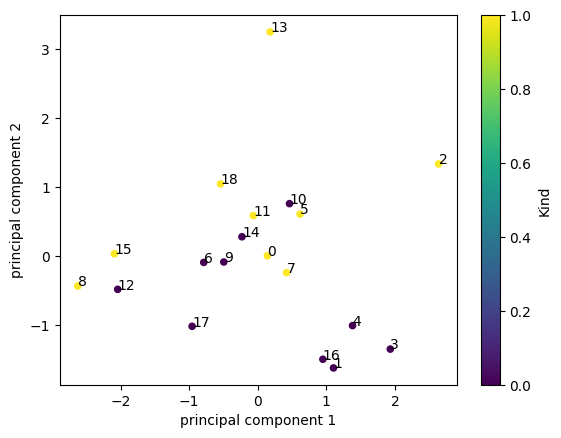

In [2]:
pca_df_new = pca_df
pca_df_new['Kind'] = df[['Kind']].copy()

ax1 = pca_df_new.plot.scatter(x='principal component 1',y='principal component 2',c='Kind', colormap='viridis')
for i, label in enumerate(pca_df_new['test_name']):
    plt.annotate(i, (pca_df_new['principal component 1'][i], pca_df_new['principal component 2'][i]))


## Explained variance

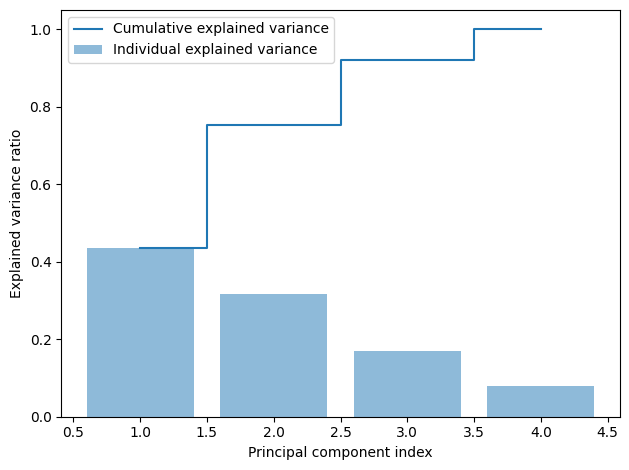

In [3]:
from pca.pca import *
x = get_features(df_data,features)
X_std = StandardScaler().fit_transform(x)
exp_var_pca = get_explained_variance(X_std)
plot_explained_variance(exp_var_pca)

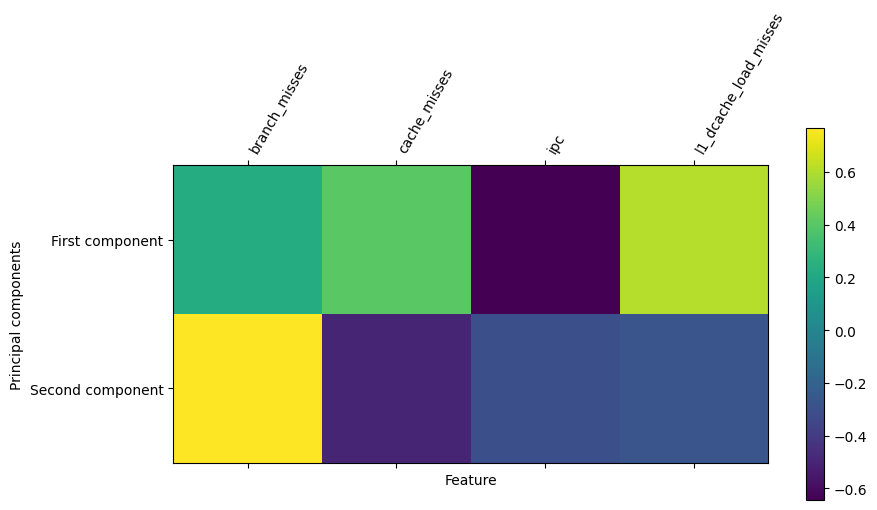

In [4]:
from pca.pca import *
plot_pca_vectors(X_std, features)

# Plot characteristics of the worklaods

,branch_misses,cache_misses,ipc,l1_dcache_load_misses
Kind,,,,
0,1.342000,38.582100,1.205000,7.939000
1,2.964444,16.661111,1.164444,6.242222


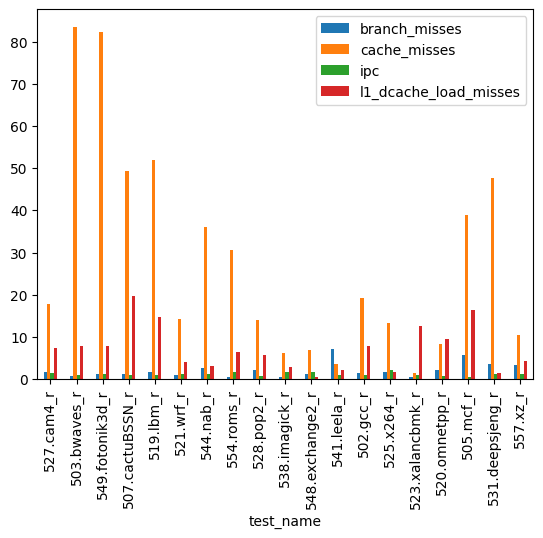

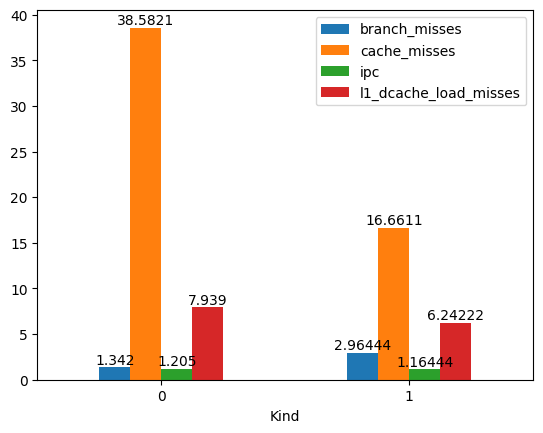

In [5]:
df = pd.read_csv(filename)
df = df.sort_values(by=['Kind'])
df = df.drop('Kind', axis=1)
df.plot.bar(x="test_name")

df = pd.read_csv(filename)
df_groups_summary = df.groupby(['Kind']).mean()
#df_groups_summary.plot.bar(rot=0)
ax = df_groups_summary.plot.bar(rot=0)

for container in ax.containers:
    ax.bar_label(container)

display(df_groups_summary)


'Optimal number of clusters = 5'

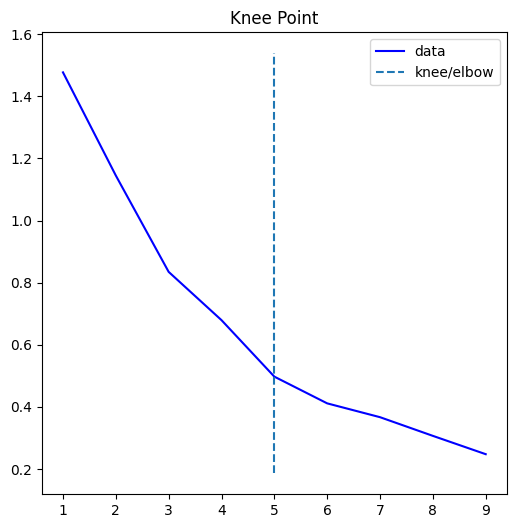

In [6]:
from clustering.distortion import *
from clustering.cluster_score import *
clusters = calculate_elbow(pca_df)[0]
display(f"Optimal number of clusters = {clusters}")

In [7]:
print(f'Optimal number of clusters = {clusters}')

Optimal number of clusters = 5


## Clasification based on optimal number of clusters

In [9]:
from clustering.clustering import *

df_result,kmeans,SSE = kmean_cluster(pca_df,clusters)

print(df_result)

   PRED        test_name
0     0        502.gcc_r
0     0    520.omnetpp_r
0     0        521.wrf_r
0     0  523.xalancbmk_r
0     0       527.cam4_r
0     0       528.pop2_r
0     0  531.deepsjeng_r
0     0        544.nab_r
0     0         557.xz_r
1     1     503.bwaves_r
1     1  507.cactuBSSN_r
1     1        519.lbm_r
1     1  549.fotonik3d_r
2     2       525.x264_r
2     2    538.imagick_r
2     2  548.exchange2_r
2     2       554.roms_r
3     3        505.mcf_r
4     4      541.leela_r


## Clasification based on FP/INT clusters

,cluster,test_name,principal component 1,principal component 2
0,0,502.gcc_r,0.140541,-0.000475
1,1,503.bwaves_r,1.104868,-1.625813
1,1,505.mcf_r,2.636620,1.331690
1,1,507.cactuBSSN_r,1.933027,-1.352744
1,1,519.lbm_r,1.382352,-1.012055
0,0,520.omnetpp_r,0.617068,0.604615
0,0,521.wrf_r,-0.787180,-0.095993
0,0,523.xalancbmk_r,0.420571,-0.244246
0,0,525.x264_r,-2.623463,-0.439223
0,0,527.cam4_r,-0.494662,-0.089999


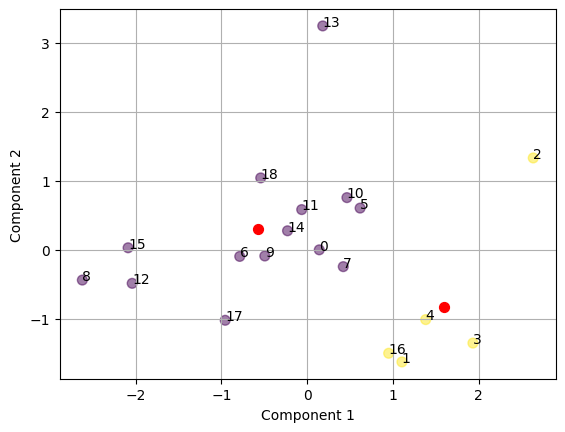

In [10]:
from clustering.clustering import *
df_result,kmeans,SSE = kmean_cluster(pca_df,2)

# create a DF based on KMEANS prediuction
df_clusters = df_result[['PRED', 'test_name']].copy()
df_clusters.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters["principal component 1"] = pca_df_sorted["principal component 1"].values
df_clusters["principal component 2"] = pca_df_sorted["principal component 2"].values
df_clusters.rename(columns={'PRED': 'cluster'}, inplace=True)
display(df_clusters)
plot_kmeans(pca_df, kmeans)

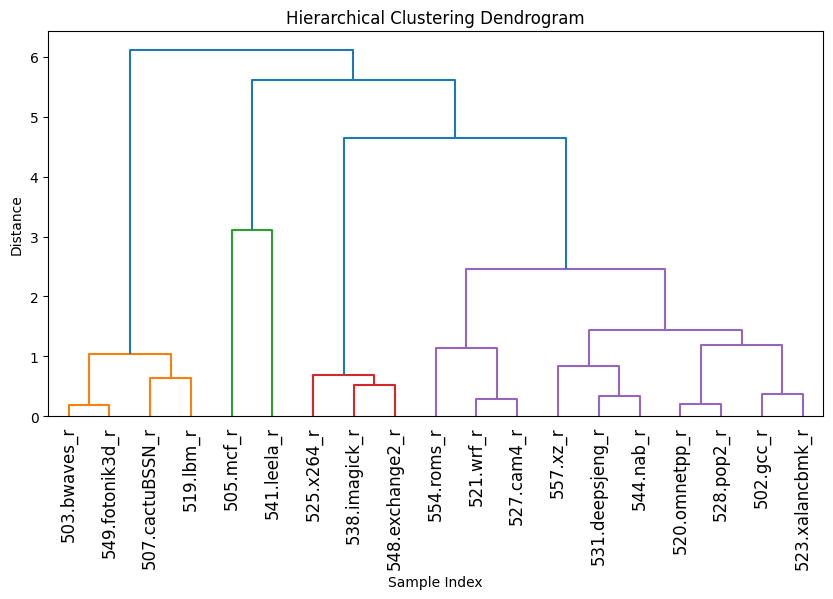

In [11]:
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate sample data
#X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
X = pca_df[['principal component 1', 'principal component 2']].copy()

# Perform hierarchical clustering to obtain the linkage matrix
Z = hierarchy.linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Z,labels=pca_df['test_name'].values)

# Rotate the labels vertically
plt.xticks(rotation=90)

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [13]:
df_result,kmeans,SSE = kmean_cluster(pca_df,2)
print(df_result)

# create a DF based on KMEANS prediuction
df_clusters = df_result[['PRED', 'test_name']].copy()
df_clusters.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters["principal component 1"] = pca_df_sorted["principal component 1"].values
df_clusters["principal component 2"] = pca_df_sorted["principal component 2"].values
df_clusters.rename(columns={'PRED': 'cluster'}, inplace=True)
display(df_clusters)

# create a DF based on real known kind
df_clusters_ = df_data[['Kind', 'test_name']].copy()
df_clusters_.sort_values(by=['test_name'], ascending=True, inplace= True)
pca_df_sorted_ = pca_df.sort_values(by=['test_name'], ascending=True)
df_clusters_["principal component 1"] = pca_df_sorted_["principal component 1"].values
df_clusters_["principal component 2"] = pca_df_sorted_["principal component 2"].values
df_clusters_.rename(columns={'Kind': 'cluster'}, inplace=True)
display(df_clusters_)


   PRED        test_name
0     0        502.gcc_r
0     0    520.omnetpp_r
0     0        521.wrf_r
0     0  523.xalancbmk_r
0     0       525.x264_r
0     0       527.cam4_r
0     0       528.pop2_r
0     0  531.deepsjeng_r
0     0    538.imagick_r
0     0      541.leela_r
0     0        544.nab_r
0     0  548.exchange2_r
0     0       554.roms_r
0     0         557.xz_r
1     1     503.bwaves_r
1     1        505.mcf_r
1     1  507.cactuBSSN_r
1     1        519.lbm_r
1     1  549.fotonik3d_r


,cluster,test_name,principal component 1,principal component 2
0,0,502.gcc_r,0.140541,-0.000475
1,1,503.bwaves_r,1.104868,-1.625813
1,1,505.mcf_r,2.636620,1.331690
1,1,507.cactuBSSN_r,1.933027,-1.352744
1,1,519.lbm_r,1.382352,-1.012055
0,0,520.omnetpp_r,0.617068,0.604615
0,0,521.wrf_r,-0.787180,-0.095993
0,0,523.xalancbmk_r,0.420571,-0.244246
0,0,525.x264_r,-2.623463,-0.439223
0,0,527.cam4_r,-0.494662,-0.089999


,cluster,test_name,principal component 1,principal component 2
0,1,502.gcc_r,0.140541,-0.000475
1,0,503.bwaves_r,1.104868,-1.625813
2,1,505.mcf_r,2.636620,1.331690
3,0,507.cactuBSSN_r,1.933027,-1.352744
4,0,519.lbm_r,1.382352,-1.012055
5,1,520.omnetpp_r,0.617068,0.604615
6,0,521.wrf_r,-0.787180,-0.095993
7,1,523.xalancbmk_r,0.420571,-0.244246
8,1,525.x264_r,-2.623463,-0.439223
9,0,527.cam4_r,-0.494662,-0.089999


## Automatic label of clusters based cosine similarity to FP/INT


\begin{equation}
\cos ({\bf t},{\bf e})= {{\bf t} {\bf e} \over \|{\bf t}\| \|{\bf e}\|} = \frac{ \sum_{i=1}^{n}{{\bf t}_i{\bf e}_i} }{ \sqrt{\sum_{i=1}^{n}{({\bf t}_i)^2}} \sqrt{\sum_{i=1}^{n}{({\bf e}_i)^2}} }
\end{equation}


A = PRED -> 0
cosine_similarity vs fp_tests 0.50709255283711
cosine_similarity vs int_tests 0.7126966450997984
cosine_similarity_int > cosine_similarity_fp
Assigining 1 label to pred cluster

B = PRED -> 1
cosine_similarity vs fp_tests 0.5656854249492379
cosine_similarity vs int_tests 0.14907119849998599
cosine_similarity_fp > cosine_similarity_int
Assigining 0 label to pred cluster


,labels,val_pred,val_true
13,557.xz_r,1,1
12,554.roms_r,1,0
18,549.fotonik3d_r,0,0
11,548.exchange2_r,1,1
10,544.nab_r,1,0
9,541.leela_r,1,1
8,538.imagick_r,1,0
7,531.deepsjeng_r,1,1
6,528.pop2_r,1,0
5,527.cam4_r,1,0


,labels,val_pred,val_true
12,554.roms_r,1,0
10,544.nab_r,1,0
8,538.imagick_r,1,0
6,528.pop2_r,1,0
5,527.cam4_r,1,0
2,521.wrf_r,1,0
15,505.mcf_r,0,1



adjusted_rand_score 0.026829268292682926

normalized_mutual_info_score 0.08971122333451109

fowlkes_mallows_score 0.5417424702254385

hamming_distance 0.3684210526315789


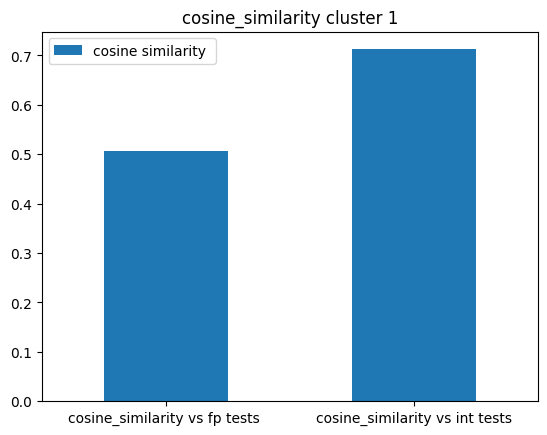

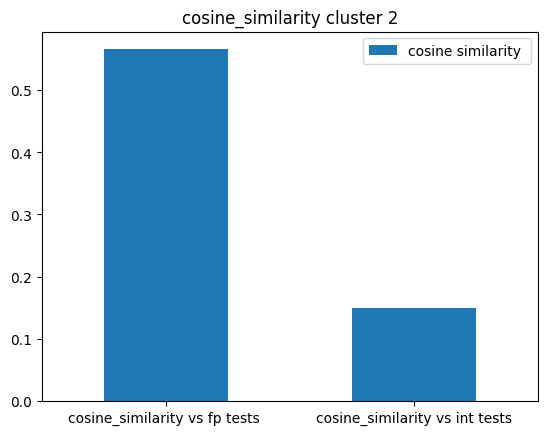

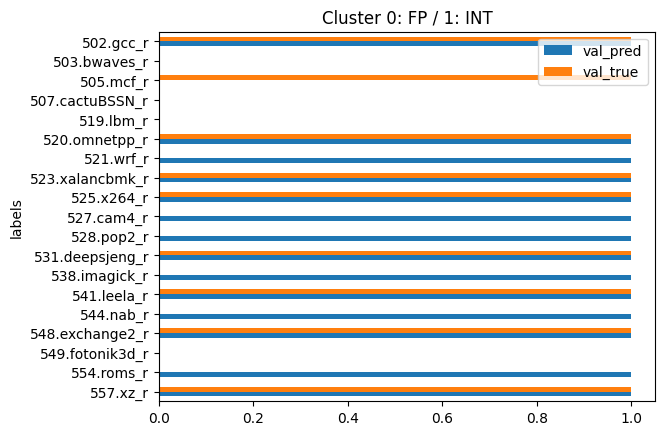

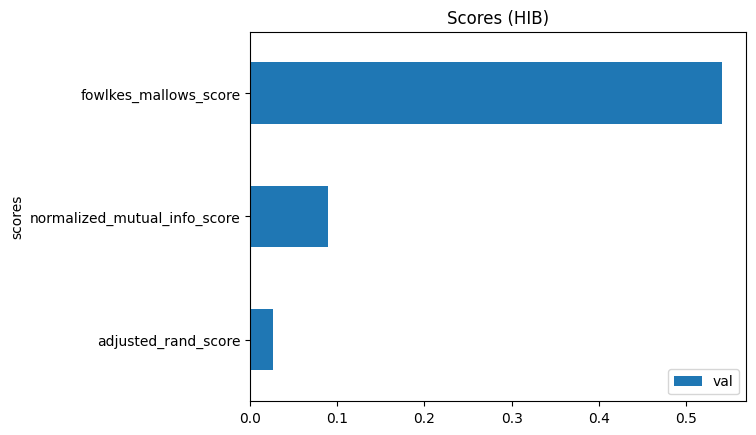

In [14]:
df = pd.read_csv("references/clusters_spec2017_specrate.csv")
df_sorted = df.sort_values(by='REAL')
fp_tests = df_sorted[df_sorted['REAL'] == 0]
int_tests = df_sorted[df_sorted['REAL'] == 1]

df = pd.read_csv("clusters.csv")
df_sorted = df.sort_values(by='PRED')
A = df_sorted[df_sorted['PRED'] == 0]
B = df_sorted[df_sorted['PRED'] == 1]

C = normalize(A,B,fp_tests,int_tests)
C_sorted =  C.sort_values(by='test_name', ascending=False)

REAL = pd.read_csv("references/clusters_spec2017_specrate.csv")
REAL_sorted = REAL.sort_values(by='test_name', ascending=False)

labels_pred = C_sorted["PRED"].tolist()
labels_pred_ = [eval(i) for i in labels_pred]
labels_pred = labels_pred_

labels_true = REAL_sorted["REAL"].tolist()

df = pd.DataFrame({'labels':C_sorted['test_name'], 'val_pred':labels_pred, 'val_true':labels_true})
display(df)
df.to_csv("clusters.csv")

print()
df_ = df.loc[~(df['val_pred'] == df['val_true'])]
display(df_)

ax = df.plot.barh(x='labels', y=['val_pred','val_true'],  rot=0, title= "Cluster 0: FP / 1: INT")

scores_result = scores(labels_true,labels_pred)

df = pd.DataFrame({'scores':['adjusted_rand_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score'], 'val':scores_result[:-1]})
ax = df.plot.barh(x='scores', y='val', rot=0, title= "Scores (HIB)")

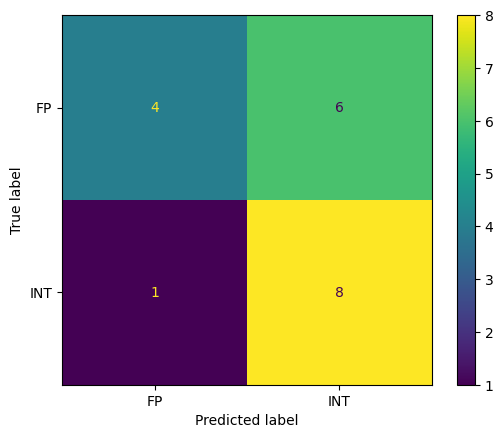

In [15]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

df = pd.read_csv('clusters.csv')
actual = df['val_true'].tolist()
predicted = df['val_pred'].tolist()

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['FP', 'INT'])

cm_display.plot()
plt.show()

# Get the test cases closer to centroid

In [13]:
from sklearn.metrics import pairwise_distances_argmin_min
X = pd.read_csv("pca.csv", usecols = ['principal component 1','principal component 2'])
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
pca_df = pd.read_csv("pca.csv")
pca_df.iloc[closest]

,Unnamed: 0,principal component 1,principal component 2,test_name
4,4,1.382352,-1.012055,519.lbm_r
14,14,-0.229679,0.275763,544.nab_r


## Use supervised ML to validate with testing and training data

### K-Nearest Neighbors Algorithm better accuracy

In [14]:
display(pca_df_new)
# Use known kind based on KMEANS prediction
X = pca_df_new[["principal component 1","principal component 2"]]
y = pca_df_new[["Kind"]]

accuracy_results = {}

,principal component 1,principal component 2,test_name,Kind
0,0.140541,-0.000475,502.gcc_r,1.0
1,1.104868,-1.625813,503.bwaves_r,0.0
2,2.636620,1.331690,505.mcf_r,1.0
3,1.933027,-1.352744,507.cactuBSSN_r,0.0
4,1.382352,-1.012055,519.lbm_r,0.0
5,0.617068,0.604615,520.omnetpp_r,1.0
6,-0.787180,-0.095993,521.wrf_r,0.0
7,0.420571,-0.244246,523.xalancbmk_r,1.0
8,-2.623463,-0.439223,525.x264_r,1.0
9,-0.494662,-0.089999,527.cam4_r,0.0


In [15]:
# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

knn_score = 0

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train,y_train.values.ravel())
    print(knn.score(X_test, y_test))
    knn_score += knn.score(X_test, y_test)
    

print(f'knn.score average  = {knn_score/10}')
accuracy_results['knn_score'] = knn_score/10

0.5
0.5
0.25
0.5
0.25
0.5
1.0
0.25
0.75
1.0
knn.score average  = 0.55


### Decision Tree Algorithm


In [16]:
from statistics import mean
from statistics import stdev
def get_accuracty(X,y,loops,clf):
    p_total = []
    r_total = []
    f_total = []

    for i in range(loops):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        clf.fit(X_train,y_train)

        # Predict Accuracy Score
        y_pred = clf.predict(X_test)
        p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
        p_total.append(p)
        r_total.append(r)
        f_total.append(f)
    return p_total,r_total,f_total


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

loops = 10
clf = DecisionTreeClassifier()
p_total_wpca,r_total_wpca,f_total_wpca = get_accuracty(X,y,loops,clf)
    
print(f"Precision score {mean(p_total_wpca)} STED {stdev(p_total_wpca)}")
print(f"Recall score {mean(r_total_wpca)} STED {stdev(p_total_wpca)}")
print(f"F-beta score {mean(f_total_wpca)} STED {stdev(p_total_wpca)}")

accuracy_results['Decision_Tree_precision_score_wpca'] = mean(p_total_wpca)
accuracy_results['Decision_Tree_recall_score_wpca'] = mean(r_total_wpca)
accuracy_results['Decision_Tree_F_score_wpca'] = mean(f_total_wpca)

Precision score 0.6208333333333333 STED 0.2738964952741396
Recall score 0.7333333333333333 STED 0.2738964952741396
F-beta score 0.5466666666666666 STED 0.2738964952741396


### Decision Tree Algorithm w/o PCA


In [17]:
from statistics import mean
from statistics import stdev

def get_accuracty(X,y,loops,clf):
    p_total = []
    r_total = []
    f_total = []

    for i in range(loops):

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
        clf.fit(X_train,y_train)

        # Predict Accuracy Score
        y_pred = clf.predict(X_test)
        p,r,f,s = precision_recall_fscore_support(y_test, y_pred, average='weighted', labels=y_pred,zero_division=1)
        p_total.append(p)
        r_total.append(r)
        f_total.append(f)
    return p_total,r_total,f_total

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_fscore_support

# Split into training and test set
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

loops = 10
clf = DecisionTreeClassifier()

filename = 'post_silicon/summary_phd_specrate.csv'
df_data = pd.read_csv(filename)
df_data.fillna(0,inplace=True)

if os.path.exists(filename):
    df = pd.read_csv(filename)
    display(df)
    df_ = df.loc[:, df.columns != 'test_name']
    df_ = (df_-df_.min())/(df_.max()-df_.min())
    extracted_col = df["test_name"]
    df_.insert(0, 'test_name', extracted_col)
    df_.set_index('test_name')
    df_.to_csv('normalized_df.csv')
    df = df_
    features = list(df.columns)[2:]
    test_column = list(df.columns)[0]
    x = df.loc[:, features].values
    X_std = StandardScaler().fit_transform(x)
    y = df['Kind']

p_total,r_total,f_total = get_accuracty(x,y,loops,clf)
    
print(f"Precision score {mean(p_total)} STED {stdev(p_total)}")
print(f"Recall score {mean(r_total)} STED {stdev(p_total)}")
print(f"F-beta score {mean(f_total)} STED {stdev(p_total)}")

accuracy_results['Decision_Tree_precision_score'] = mean(p_total)
accuracy_results['Decision_Tree_recall_score'] = mean(r_total)
accuracy_results['Decision_Tree_F_score'] = mean(f_total)

,test_name,Kind,branch_misses,cache_misses,ipc,l1_dcache_load_misses
0,502.gcc_r,1,1.50,19.155,1.01,7.93
1,503.bwaves_r,0,0.81,83.474,1.01,7.83
2,505.mcf_r,1,5.65,38.871,0.61,16.37
3,507.cactuBSSN_r,0,1.24,49.287,1.03,19.66
4,519.lbm_r,0,1.64,51.959,1.08,14.75
5,520.omnetpp_r,1,2.11,8.288,0.76,9.46
6,521.wrf_r,0,0.95,14.311,1.21,4.00
7,523.xalancbmk_r,1,0.50,1.549,0.90,12.51
8,525.x264_r,1,1.58,13.336,2.24,1.73
9,527.cam4_r,0,1.76,17.822,1.37,7.29


Precision score 0.5708333333333333 STED 0.26791519065315433
Recall score 0.7583333333333333 STED 0.26791519065315433
F-beta score 0.5366666666666666 STED 0.26791519065315433


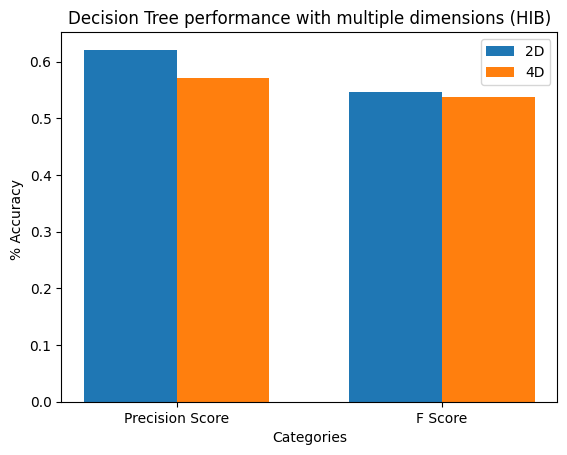

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from statistics import mean
from statistics import stdev

# Sample data for dataframe 1
data1 = {'Category': ['Precision Score', 'F Score'],
         '2D': [mean(p_total_wpca), mean(f_total_wpca)]}
df1 = pd.DataFrame(data1)

# Sample data for dataframe 2
data2 = {'Category': ['Precision Score', 'F Socre'],
         '4D': [mean(p_total), mean(f_total)]}
df2 = pd.DataFrame(data2)

# Create the figure and subplot
fig, ax = plt.subplots()

# Plotting bars for dataframe 1
width = 0.35
x = range(len(df1['Category']))
ax.bar(x, df1['2D'], width, label='2D')

# Plotting bars for dataframe 2 next to the bars from dataframe 1
ax.bar([i + width for i in x], df2['4D'], width, label='4D')

# Customize the plot
ax.set_xticks([i + width/2 for i in x])
ax.set_xticklabels(df1['Category'])
ax.set_xlabel('Categories')
ax.set_ylabel('% Accuracy ')
ax.set_title('Decision Tree performance with multiple dimensions (HIB)')
ax.legend()

# Show the plot
plt.show()


,algorithm,accuracy
0,knn_score,0.550000
1,Decision_Tree_precision_score_wpca,0.620833
2,Decision_Tree_recall_score_wpca,0.733333
3,Decision_Tree_F_score_wpca,0.546667
4,Decision_Tree_precision_score,0.570833
5,Decision_Tree_recall_score,0.758333
6,Decision_Tree_F_score,0.536667


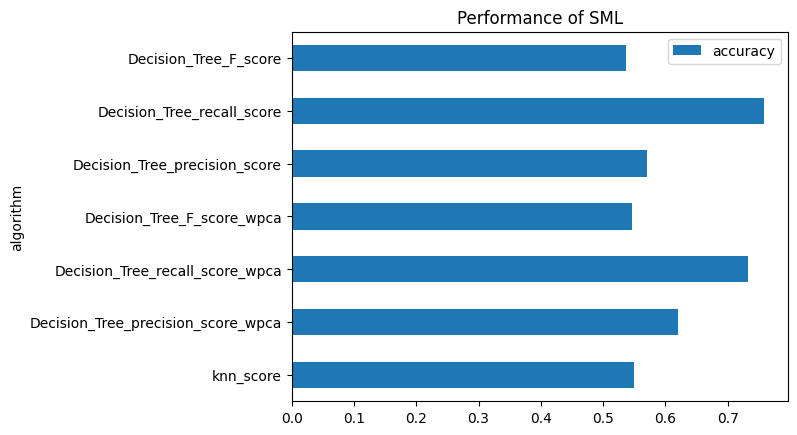

In [19]:
accuracy_results_df = pd.DataFrame(list(accuracy_results.items()),columns=['algorithm','accuracy'])
display(accuracy_results_df)
#ccuracy_results_df = accuracy_results_df.drop([0,2])
#isplay(accuracy_results_df)
accuracy_results_df.plot.barh(x='algorithm', title = 'Performance of SML');